In [119]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Life Expectancy Data.csv")

In [4]:
df.columns=df.columns.str.title().str.replace(" ","")

In [5]:
df=df.sort_values(["Country","Year"],ascending=[True,True])

In [6]:
df

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,Bmi,Under-FiveDeaths,Polio,TotalExpenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,29.9,42,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,3.3,39,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,3.8,36,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3


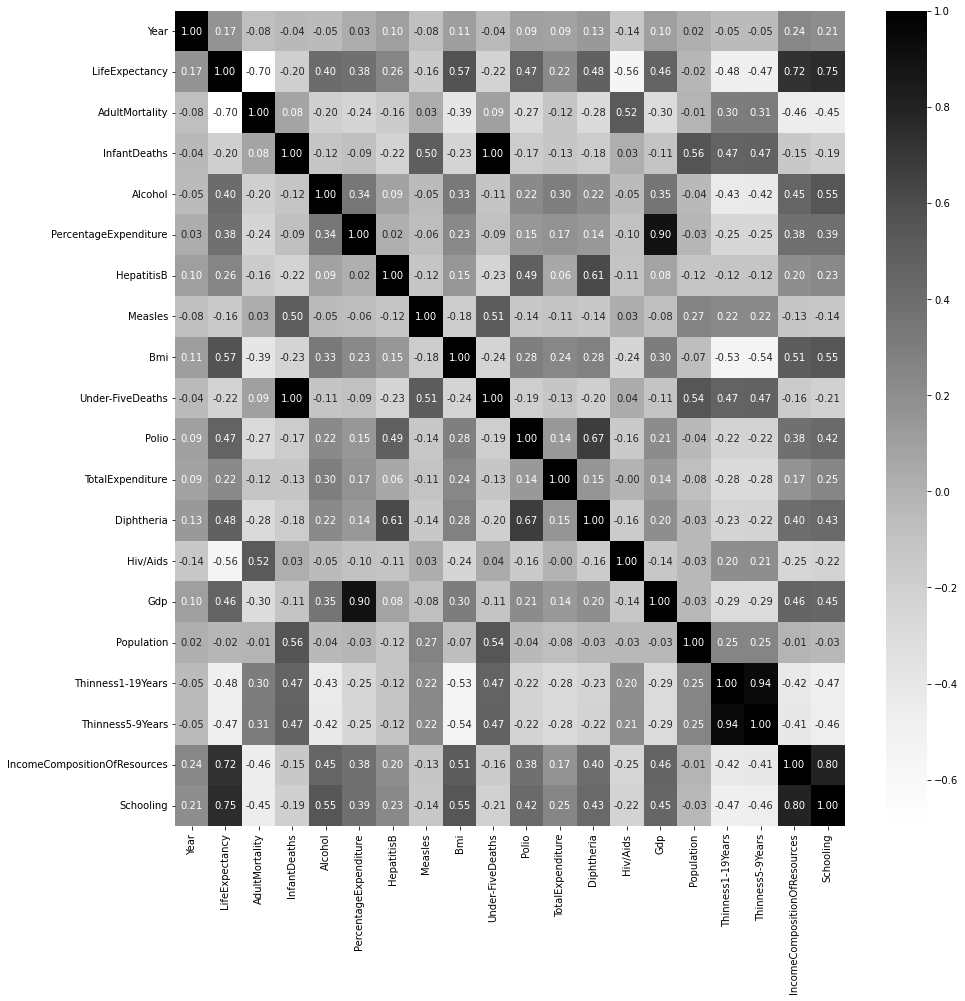

In [136]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="Greys",fmt=".2f")
plt.show()

# find columns with strong correlation between

In [10]:
col1s=[]
col2s=[]
correlations=[]
for col1 in df.columns:
    for col2 in df.columns:
        if col1!=col2 and col1 not in (["Country","Status"]) and col2 not in (["Country","Status"]):
            correlation=round(df[col1].corr(df[col2]),3)
            if correlation<-0.5 or correlation>0.6:
                col1s.append(col1)
                col2s.append(col2)
                correlations.append(correlation)
tuples=list(zip(col1s,col2s,correlations))
ndf=pd.DataFrame(tuples,columns=["col1","col2","correlation"])
ndf.drop_duplicates(subset="correlation",inplace=True)
ndf.sort_values(["col1","col2"])

,col1,col2,correlation
8,Bmi,Thinness1-19Years,-0.532
9,Bmi,Thinness5-9Years,-0.539
7,HepatitisB,Diphtheria,0.611
21,IncomeCompositionOfResources,Schooling,0.800
5,InfantDeaths,Under-FiveDeaths,0.997
0,LifeExpectancy,AdultMortality,-0.696
1,LifeExpectancy,Hiv/Aids,-0.557
2,LifeExpectancy,IncomeCompositionOfResources,0.725
3,LifeExpectancy,Schooling,0.752
6,PercentageExpenditure,Gdp,0.899


# how avg life expectancy has changed over time

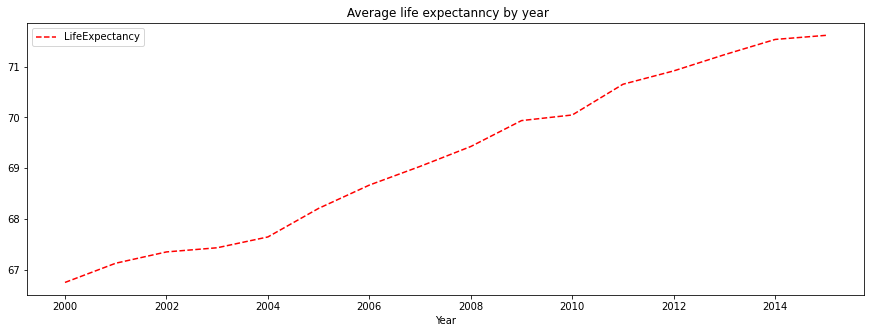

In [166]:
grouped=df.groupby("Year")["LifeExpectancy"].mean().reset_index().sort_values("Year")
grouped.plot(kind="line",figsize=(15,5),xlabel=None,x="Year",y="LifeExpectancy",color="r",ls="--")
plt.title(" Average life expectanncy by year")
plt.show()

# Find countries where life expectancy has decreased compared to the first year of survey. Plot life expectancy change graphs  for these countries

In [12]:
grouped=df[df.Year==2015].merge((df[df.Year==2000]),on="Country")[["Country","LifeExpectancy_x","LifeExpectancy_y"]]
grouped.rename(columns={"LifeExpectancy_x":"LE2015","LifeExpectancy_y":"LE2000"},inplace=True)
result=grouped[grouped.LE2015-grouped.LE2000<0]
result

,Country,LE2015,LE2000
54,Estonia,77.6,78.0
65,Grenada,73.6,74.0
77,Iraq,68.9,70.0
94,Libya,72.7,78.0
124,Paraguay,74.0,79.0
132,Romania,75.0,77.0
136,Saint Vincent and the Grenadines,73.2,79.0
158,Syrian Arab Republic,64.5,72.6
180,Yemen,65.7,68.0


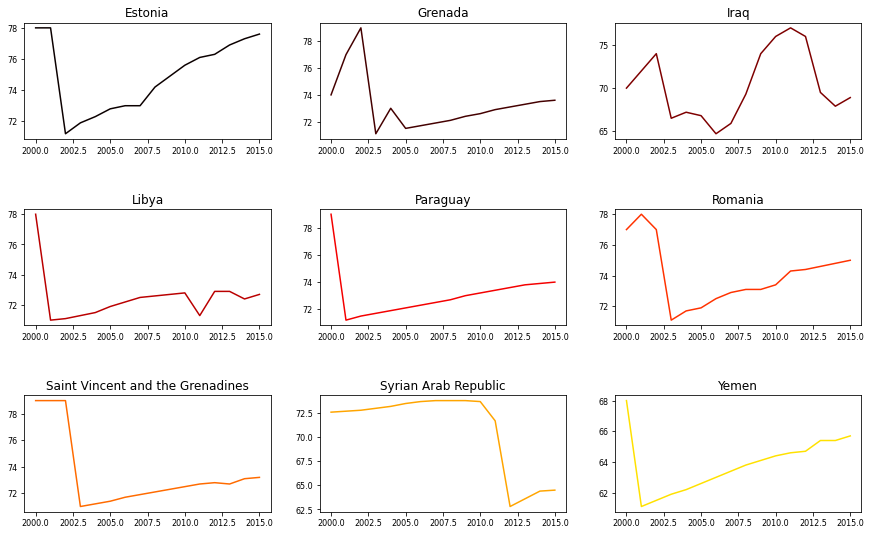

In [164]:
countries=[i for i in result["Country"]]
cmap=plt.get_cmap("hot")
colors=list(cmap(np.linspace(0,0.7,len(result.Country.unique()))))
fig,axes=plt.subplots(3,3,figsize=(15,9))
for ax,country,col in zip(axes.ravel(),countries,colors):
    df[df.Country==country].plot(kind="line",ax=ax,x="Year",y="LifeExpectancy",xlabel="",legend=False,fontsize=8,rot=0,color=col)
    ax.set_title(country)
    plt.subplots_adjust(hspace=0.6)
plt.show()
    
    

# find countries where development status changed between 2000 and 2015

In [57]:
grouped=df.drop_duplicates(subset=["Country","Status"])[["Country","Status"]].\
groupby(["Country","Status"])["Country"].count().reset_index(name="Count")
grouped[grouped.Count!=1]
# there are no countries which development development status between these years

,Country,Status,Count


# how was avg alcohol consumption changing between 2000 and 2015

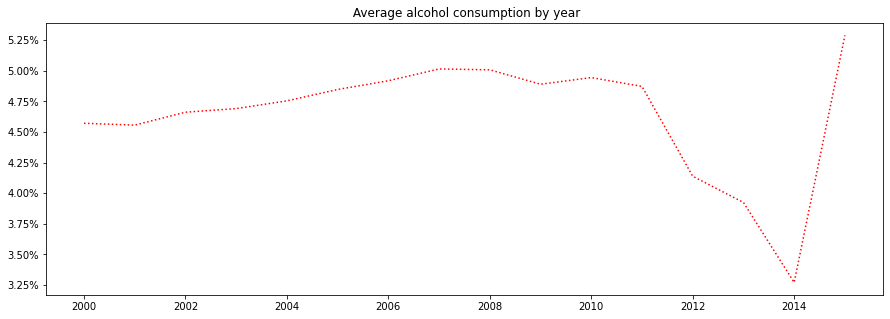

In [168]:
grouped=df.groupby("Year")["Alcohol"].mean().reset_index().sort_values("Year")
grouped.plot(kind="line",x="Year",y="Alcohol",figsize=(15,5),legend=False,xlabel="",color="r",ls=":")
plt.title(" Average alcohol consumption by year")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

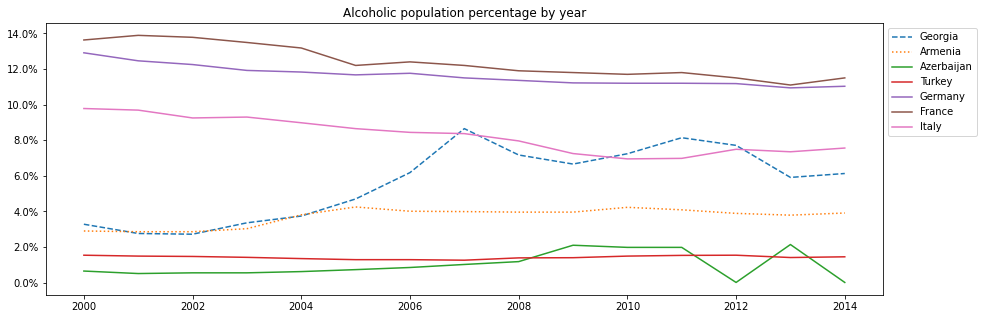

In [140]:
countries=["Georgia","Armenia","Azerbaijan","Turkey","Germany","France","Italy"]
plt.figure(figsize=(15,5))
for c in countries:
    plt.plot(df[df.Country==c]["Year"],df[df.Country==c]["Alcohol"],ls="--" if c=="Georgia" else ":" if c=="Armenia" else "-")
    plt.title("Alcoholic population percentage by year")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
    plt.legend(countries,bbox_to_anchor=(1,1))
plt.show()

In [141]:
df

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,Bmi,Under-FiveDeaths,Polio,TotalExpenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling,gdppercapita
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5,389.983524
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9,39.608443
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,8.546252
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5,84.034277
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,9.085847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,29.9,42,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,58.382458
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,3.3,39,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,649.294459
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,3.8,36,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4,715.491174
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,8.271302


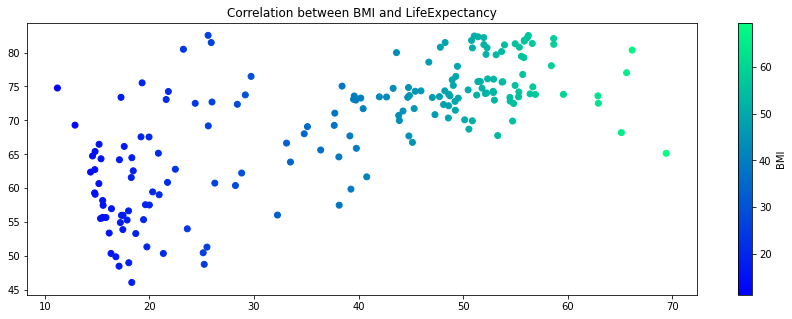

In [159]:
grouped=df.groupby("Country").agg({"Bmi":"mean","LifeExpectancy":"mean"}).reset_index()
plt.figure(figsize=(15,5))
plt.scatter(grouped.Bmi,grouped.LifeExpectancy,c=grouped.Bmi,cmap="winter")
plt.colorbar().set_label("BMI")
plt.title("Correlation between BMI and LifeExpectancy")
plt.show()